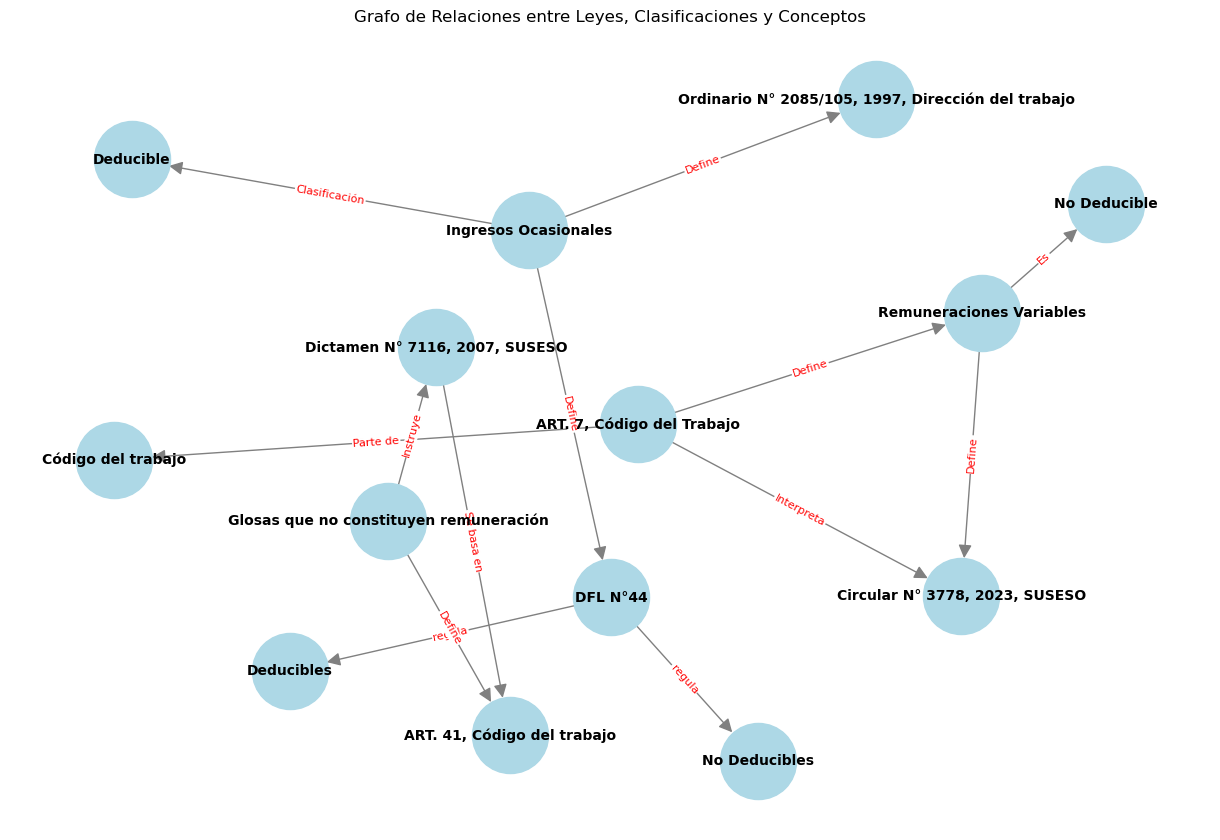

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Definir los datos usando diccionarios
datos = [
    {"nodo": "DFL N°44", "nodos_relacionados": ["Deducibles", "No Deducibles", ], "tipo_relacion": ["regula", "regula"]},
    {"nodo": "Ingresos Ocasionales", "nodos_relacionados": ["DFL N°44", "Ordinario N° 2085/105, 1997, Dirección del trabajo", "Deducible"], "tipo_relacion": ["Define","Define", "Clasificación"]},
    {"nodo": "Glosas que no constituyen remuneración", "nodos_relacionados": ["ART. 41, Código del trabajo", "Dictamen N° 7116, 2007, SUSESO","Deducible"], "tipo_relacion": ["Define", "Instruye"]},
    {"nodo": "Dictamen N° 7116, 2007, SUSESO", "nodos_relacionados": ["ART. 41, Código del trabajo"], "tipo_relacion": ["Se basa en"]},
    # {"nodo": "ART. 30, 16744", "nodos_relacionados": ["Alzas de sueldo por leyes generales", "Alzas de sueldo por convenios colectivos de trabajo"], "tipo_relacion": [""]},
    {"nodo": "ART. 7, Código del Trabajo", "nodos_relacionados": ["Remuneraciones Variables", "Código del trabajo","Circular N° 3778, 2023, SUSESO",  ], "tipo_relacion": ["Define", "Parte de", "Interpreta"]},
    {"nodo": "Remuneraciones Variables", "nodos_relacionados": ["No Deducible", "Circular N° 3778, 2023, SUSESO"], "tipo_relacion": ["Es", "Define"]},
]

G = nx.DiGraph()

# Definir los datos usando diccionarios, indicando la dirección de la relación
datos = {
    "DFL N°44": {"relaciones": [("Deducibles", "regula"), ("No Deducibles", "regula")]},
    "Ingresos Ocasionales": {
        "relaciones": [("DFL N°44", "Define"), ("Ordinario N° 2085/105, 1997, Dirección del trabajo", "Define"), ("Deducible", "Clasificación")]
    },
    "Glosas que no constituyen remuneración": {
        "relaciones": [("ART. 41, Código del trabajo", "Define"), ("Dictamen N° 7116, 2007, SUSESO", "Instruye"), ("Deducible", "Clasificación")]
    },
    "Dictamen N° 7116, 2007, SUSESO": {"relaciones": [("ART. 41, Código del trabajo", "Se basa en")]},
    "ART. 7, Código del Trabajo": {
        "relaciones": [("Remuneraciones Variables", "Define"), ("Código del trabajo", "Parte de"), ("Circular N° 3778, 2023, SUSESO", "Interpreta")]
    },
    "Remuneraciones Variables": {"relaciones": [("No Deducible", "Es"), ("Circular N° 3778, 2023, SUSESO", "Define")]}
}

# Añadir nodos y relaciones al grafo
for dato in datos:
    nodo = dato["nodo"]
    G.add_node(nodo)  # Añadir el nodo al grafo
    
    # Iterar sobre los nodos relacionados y los tipos de relación
    for nodo_relacionado, tipo_relacion in zip(dato["nodos_relacionados"], dato["tipo_relacion"]):
        G.add_node(nodo_relacionado)  # Asegurar que el nodo relacionado también esté en el grafo
        G.add_edge(nodo, nodo_relacionado, relation=tipo_relacion)  # Añadir el arco con la relación

# Añadir nodos y relaciones al grafo
for nodo, info in datos.items():
    G.add_node(nodo)  # Añadir el nodo al grafo
    for nodo_relacionado, tipo_relacion in info["relaciones"]:
        G.add_node(nodo_relacionado)  # Asegurar que el nodo relacionado también esté en el grafo
        G.add_edge(nodo, nodo_relacionado, relation=tipo_relacion)  # Añadir el arco con la relación


# Crear un layout optimizado
pos = nx.spring_layout(G, k=0.9, iterations=50)  # Puedes ajustar 'k' para más o menos espacio entre nodos

# Obtener las etiquetas de los arcos
labels = nx.get_edge_attributes(G, 'relation')

# Dibujar nodos y arcos con opciones mejoradas
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=3000,  # Aumentar el tamaño de los nodos para que las etiquetas quepan dentro
    font_size=10,
    font_color='black',
    font_weight='bold',
    edge_color='gray',  # Mejorar el contraste de los arcos
    arrowsize=20
)

# # Añadir un fondo blanco a las etiquetas de los nodos para que se vean mejor
# node_labels = nx.draw_networkx_labels(
#     G, pos, font_size=10,
#     bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
# )

# Dibujar etiquetas de los arcos
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=labels,
    font_color='red',
    font_size=8,
    label_pos=0.5,  # Ajuste de posición de las etiquetas de los arcos
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1')
)

plt.title('Grafo de Relaciones entre Leyes, Clasificaciones y Conceptos')
plt.axis('off')  # Ocultar los ejes para una mejor visualización
plt.show()

Propuesta con direcciones

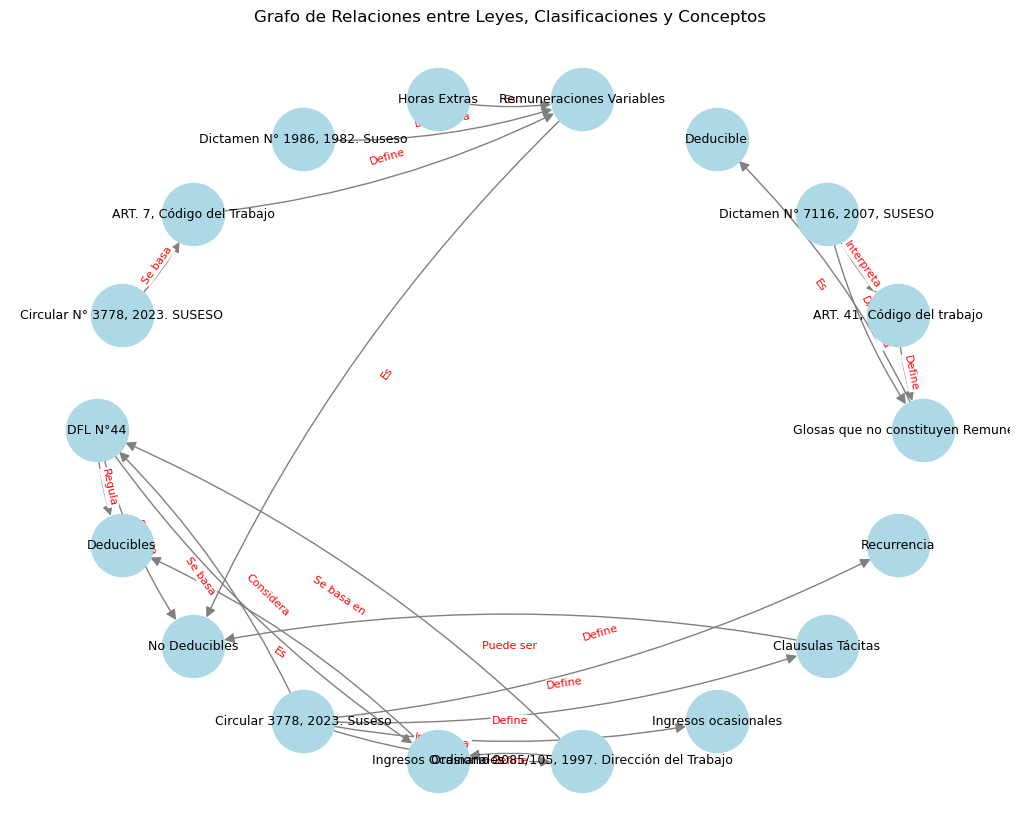

In [4]:

import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Definir los datos usando diccionarios, indicando la dirección de la relación con 0 y 1
# 0: "origen" (el nodo actual es el origen), 1: "destino" (el nodo actual es el destino)
datos = {
    "DFL N°44": {
        "relaciones": [
            {"nodo": "Deducibles", "tipo_relacion": "Regula", "direccion": 0},  # DFL N°44 -> Deducibles
            {"nodo": "No Deducibles", "tipo_relacion": "Regula", "direccion": 0},  # DFL N°44 -> No Deducibles
            {"nodo": "Circular 3778, 2023. Suseso", "tipo_relacion": "Se basa", "direccion": 1},
            {"nodo": "Ingresos Ocasionales", "tipo_relacion": "Considera", "direccion": 0},
            {"nodo": "Ordinario 2085/105, 1997. Dirección del Trabajo", "tipo_relacion": "Se basa en", "direccion": 1}    

        ]
    },
    "Circular 3778, 2023. Suseso": {
        "relaciones": [
            {"nodo": "Ingresos ocasionales", "tipo_relacion": "Define", "direccion": 0},
            {"nodo": "Ordinario 2085/105, 1997. Dirección del Trabajo", "tipo_relacion": "Interpreta", "direccion": 0},
            {"nodo": "Clausulas Tácitas","tipo_relacion": "Define", "direccion": 0},
            {"nodo": "Recurrencia","tipo_relacion": "Define", "direccion": 0}
            ]
    },
            #Deducibles}
    "Ingresos Ocasionales": {
        "relaciones": [
            {"nodo": "Deducibles", "tipo_relacion": "Es", "direccion": 0},  # Ingresos Ocasionales -> DFL N°44
            {"nodo": "Ordinario 2085/105, 1997. Dirección del Trabajo", "tipo_relacion": "Define", "direccion": 1} # Ingresos Ocasionales -> Deducible
        ]
    },
    "Glosas que no constituyen Remuneración": {
        "relaciones": [
            {"nodo": "ART. 41, Código del trabajo", "tipo_relacion": "Define", "direccion": 1},  # Glosas... -> ART. 41
            {"nodo": "Dictamen N° 7116, 2007, SUSESO", "tipo_relacion": "Dictamina", "direccion": 1},  # Glosas... -> Dictamen...
            {"nodo": "Deducible", "tipo_relacion": "Es", "direccion": 0}  # Glosas... -> Deducible
        ]
    },
    "Dictamen N° 7116, 2007, SUSESO": {
        "relaciones": [
            {"nodo": "ART. 41, Código del trabajo", "tipo_relacion": "Interpreta", "direccion": 0}  # Dictamen... -> ART. 41
        ]
    },
    #No Deducibles
    "No Deducibles": {
        "relaciones": [
            {"nodo": "Clausulas Tácitas", "tipo_relacion": "Puede ser", "direccion": 1},
            {"nodo": "Remuneraciones Variables", "tipo_relacion": "Es", "direccion": 1}    
        ]
    },

    "Remuneraciones Variables": {
        "relaciones": [
            {"nodo": "Horas Extras", "tipo_relacion": "Es", "direccion": 1},  # Remuneraciones... -> No Deducible
            {"nodo": "Dictamen N° 1986, 1982. Suseso", "tipo_relacion": "Dictamina", "direccion": 1}  # Remuneraciones... -> Circular...
        ]
    },

    "ART. 7, Código del Trabajo": {
        "relaciones": [
            {"nodo": "Remuneraciones Variables", "tipo_relacion": "Define", "direccion": 0},  # ART. 7 -> Remuneraciones...
            {"nodo": "Circular N° 3778, 2023. SUSESO", "tipo_relacion": "Se basa", "direccion": 1}  # ART. 7 -> Circular...
        ]
    },
}

# Añadir nodos y relaciones al grafo
for nodo, info in datos.items():
    G.add_node(nodo)  # Añadir el nodo al grafo
    for relacion in info["relaciones"]:
        nodo_relacionado = relacion["nodo"]
        tipo_relacion = relacion["tipo_relacion"]
        direccion = relacion["direccion"]
        
        # Añadir nodo relacionado
        G.add_node(nodo_relacionado)
        
        # Añadir arcos dirigidos según la dirección especificada (0: origen, 1: destino)
        if direccion == 0:
            G.add_edge(nodo, nodo_relacionado, relation=tipo_relacion)  # nodo -> nodo_relacionado
        elif direccion == 1:
            G.add_edge(nodo_relacionado, nodo, relation=tipo_relacion)  # nodo_relacionado -> nodo

# Usar un layout circular para organizar mejor los nodos
pos = nx.shell_layout(G)  # También puedes probar con nx.circular_layout

# Obtener las etiquetas de los arcos
labels = nx.get_edge_attributes(G, 'relation')

# Dibujar el grafo con una visualización más limpia
plt.figure(figsize=(10, 8))

# Dibujar nodos y arcos
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2000,  # Reducir el tamaño de los nodos
    font_size=9,  # Reducir el tamaño de la fuente
    font_color='black',
    edge_color='gray',
    arrows=True,
    arrowsize=15,  # Reducir el tamaño de las flechas
    connectionstyle='arc3,rad=0.1'  # Reducir la curvatura de las conexiones
)

# Dibujar las etiquetas de los arcos con un fondo blanco
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=labels,
    font_color='red',
    font_size=8,  # Reducir el tamaño de las etiquetas
    label_pos=0.5,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1')
)

# Título y configuración final
plt.title('Grafo de Relaciones entre Leyes, Clasificaciones y Conceptos')
plt.axis('off')  # Ocultar los ejes
plt.show()
